## Naive Bayesian

The Naive Bayesian classifier is based on Bayes’ theorem with the independence assumptions between predictors. A Naive Bayesian model is easy to build, with no complicated iterative parameter estimation which makes it particularly useful for very large datasets. Despite its simplicity, the Naive Bayesian classifier often does surprisingly well and is widely used because it often outperforms more sophisticated classification methods. 

<img src='../../img/Bayes_rule.png' height="600" width="800">

Let's look at a simple Weather dataset example:

<img src='../../img/naive_bayes_data.png' height="600" width="800">

The posterior probability can be calculated by first, constructing a frequency table for each attribute against the target. Then, transforming the frequency tables to likelihood tables and finally use the Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction. 

<img src='../../img/Bayes_3.png' height="600" width="800">

### Code Dictionary
code | description
-----|------------
`GaussianNB()` | Naive Bayesian Classification.
`.contourf` |  draw contour lines and filled contours.

In [17]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/pedrohserrano/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/pedrohserrano/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/pedrohserrano/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [4]:
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 7, 25]])

In [19]:
from pycm import *

In [21]:
cm.Overall_ACC

0.9

In [20]:
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) # Create CM From Data
cm.classes
cm.table
print(cm)

Predict          0        1        
Actual
0                65       3        
1                7        25       




Overall Statistics : 

95% CI                                                           (0.8412,0.9588)
Bennett_S                                                        0.8
Chi-Squared                                                      58.64882
Chi-Squared DF                                                   1
Conditional Entropy                                              0.41991
Cramer_V                                                         0.76583
Cross Entropy                                                    0.90995
Gwet_AC1                                                         0.82759
Joint Entropy                                                    1.32429
KL Divergence                                                    0.00557
Kappa                                                            0.76236
Kappa 95% CI                                            

In [7]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
x1rg = np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01)
x2rg = np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
X1, X2 = np.meshgrid(x1rg,
                     x2rg)

In [8]:
X1.shape

(592, 616)

In [9]:
X1.ravel().shape

(364672,)

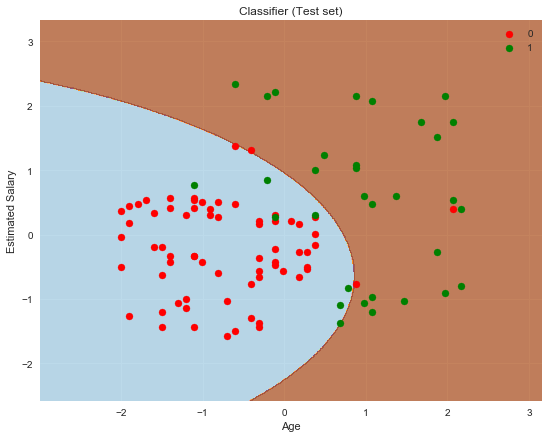

In [10]:
plt.figure(figsize=(9,7))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = plt.cm.Paired)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

In [11]:
##![Bayes](../../img/bayes.png)

In [12]:
np.array([X1.ravel(), X2.ravel()]).shape

(2, 364672)

In [13]:
a = [1,2,3,4,5,6]
np.exp(-0.5 * (a - np.mean(a)) ** 2 / np.std(a) ** 2)

array([0.34251886, 0.67996477, 0.95804824, 0.95804824, 0.67996477,
       0.34251886])

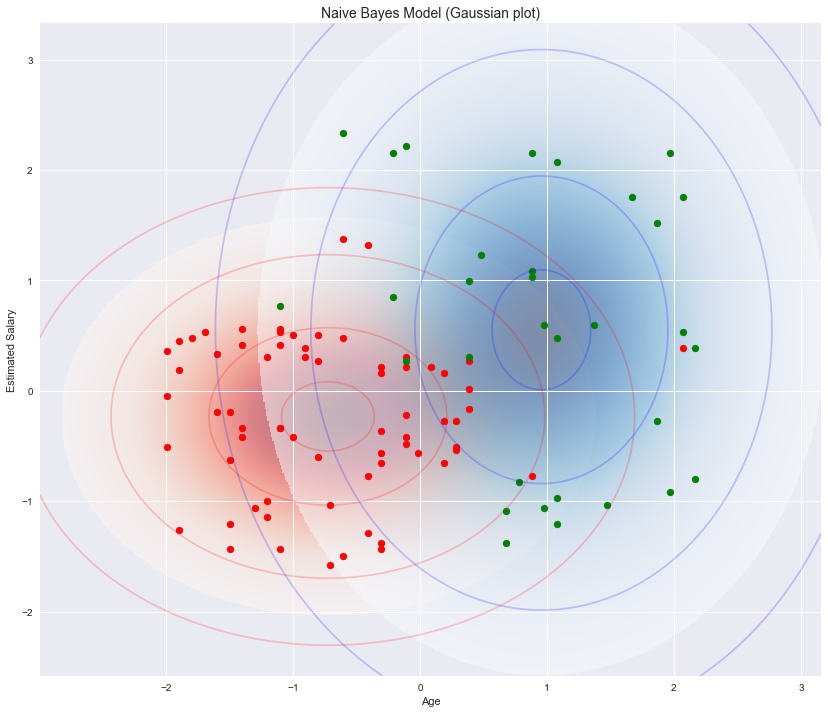

In [14]:
Xgrid = np.array([X1.ravel(), X2.ravel()]).T
fig, ax = plt.subplots(figsize=(14,12))
ax.set_title('Naive Bayes Model (Gaussian plot)', size=14)
ax.set_xlabel('Age')
ax.set_ylabel('Estimated Salary')
ax.set(xlim=(X1.min(), X1.max()), ylim=(X2.min(), X2.max()))
for i, j in enumerate(np.unique(y_set)):
    ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
for label, color in enumerate(['red', 'blue']):
    mask = (y_set == label)
    mu, std = X_set[mask].mean(0), X_set[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(x1rg, x2rg, Pm.reshape(X1.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(X1, X2, P.reshape(X1.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

In [15]:
##![Gauss](../../img/gauss.png)